In [24]:
#http://kikei.github.io/ai/2017/07/29/binary-classification.html


import pandas as pd
df = pd.read_csv('isigaki_miyako_iriomote_wavedata/isigaki_test.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 1:].values
#print(X)
y = df.loc[:, 0].values
#print(y)
#y = np.where(y <= 1, 0, 1)#1は雨の合計降水量
le = LabelEncoder()
#print(y)
y = le.fit_transform(y)
#print(y)

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.02, random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [29]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
 # create model
def build_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(2, )))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# train model
model=build_model()
hist = model.fit(X_train_pca, y_train, nb_epoch=100,  verbose=1)#batch_size=100,
# result
result = model.layers[0].get_weights()
w1 = result[0][0, 0]
w2 = result[0][1, 0]
b = result[1][0]
print (w1, w2, b)

/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
4653/4653 [==============================] - 0s 90us/step - loss: 0.7508 - acc: 0.5289
Epoch 2/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.6578 - acc: 0.5992
Epoch 3/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.5785 - acc: 0.6897
Epoch 4/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.5115 - acc: 0.8115
Epoch 5/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.4549 - acc: 0.9241
Epoch 6/100
4653/4653 [==============================] - 0s 31us/step - loss: 0.4069 - acc: 0.9832
Epoch 7/100
4653/4653 [==============================] - 0s 30us/step - loss: 0.3661 - acc: 0.9944
Epoch 8/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.3311 - acc: 0.9946
Epoch 9/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.3008 - acc: 0.9948
Epoch 10/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.2742 - acc: 0.9953
Epoch 11/

4653/4653 [==============================] - 0s 33us/step - loss: 0.0128 - acc: 0.9959
Epoch 84/100
4653/4653 [==============================] - 0s 34us/step - loss: 0.0127 - acc: 0.9959
Epoch 85/100
4653/4653 [==============================] - 0s 30us/step - loss: 0.0126 - acc: 0.9959
Epoch 86/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.0125 - acc: 0.9959
Epoch 87/100
4653/4653 [==============================] - 0s 29us/step - loss: 0.0124 - acc: 0.9959
Epoch 88/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.0124 - acc: 0.9959
Epoch 89/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.0123 - acc: 0.9959
Epoch 90/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.0122 - acc: 0.9959
Epoch 91/100
4653/4653 [==============================] - 0s 28us/step - loss: 0.0122 - acc: 0.9959
Epoch 92/100
4653/4653 [==============================] - 0s 30us/step - loss: 0.0121 - acc: 0.9959
Epoch 93/100


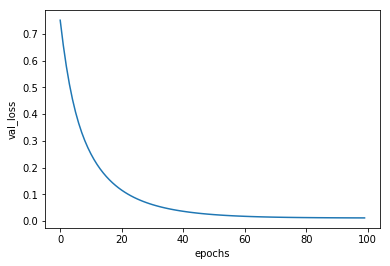

In [30]:
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt

plt.clf()
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.plot(np.arange(0, 100), hist.history['loss'], label='loss')
#plt.plot(np.arange(0, 5000), hist.history['val_loss'], label='val_loss')
plt.savefig('fit_loss.png')

In [31]:
scores = model.evaluate(X_test_pca, y_test)
print(scores)
predict = model.predict(X_test_pca, batch_size=32)
print(predict)
predict_classes = model.predict_classes(X_test_pca, batch_size=32)
print(predict_classes)
print(y_test)

95/95 [==============================] - 0s 3ms/step
[0.007930546535767222, 1.0]
[[1.3530304e-03]
 [2.1080852e-03]
 [2.4677422e-03]
 [3.7919730e-03]
 [1.3824563e-03]
 [2.3006508e-03]
 [8.0606906e-04]
 [2.2988117e-03]
 [7.5369584e-03]
 [2.3390062e-03]
 [1.9353487e-03]
 [9.3469268e-04]
 [3.0160204e-03]
 [1.0830702e-03]
 [1.1085295e-03]
 [1.0286709e-03]
 [7.9566287e-04]
 [5.9031480e-04]
 [1.1788680e-03]
 [9.6549554e-04]
 [1.0780293e-03]
 [6.1013198e-01]
 [1.7637383e-03]
 [1.3648943e-02]
 [2.1600977e-03]
 [7.1485393e-04]
 [1.7937067e-03]
 [2.3148772e-03]
 [8.8756601e-04]
 [1.7622673e-03]
 [9.7840128e-04]
 [3.2955047e-03]
 [1.2683716e-03]
 [1.0194052e-03]
 [2.6635132e-03]
 [2.6836311e-03]
 [1.5561027e-03]
 [3.2431325e-03]
 [6.7318510e-04]
 [3.9951992e-03]
 [1.4812398e-03]
 [3.0400427e-03]
 [7.1247839e-03]
 [1.3754253e-03]
 [1.0250752e-03]
 [1.3060706e-03]
 [1.1623054e-03]
 [2.8592504e-03]
 [2.8193130e-03]
 [1.4354562e-03]
 [1.5592827e-03]
 [1.9793466e-03]
 [1.1936357e-02]
 [2.5945974e-03]
 

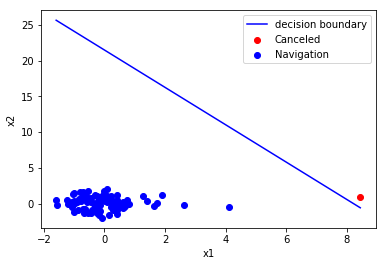

In [32]:
import matplotlib.pyplot as plt

def plot_data(X, t):
    positive = [i for i in range(len(t)) if t[i] == 1]
    negative = [i for i in range(len(t)) if t[i] == 0]

    plt.scatter(X[positive, 0], X[positive, 1], c='red', marker='o', label='Canceled')
    plt.scatter(X[negative, 0], X[negative, 1], c='blue', marker='o', label='Navigation')

# plot training data
plt.figure(1)
plot_data(X_test_pca, y_test)

# draw decision boundary
plt.figure(1)
xmin, xmax = min(X_test_pca[:, 0]), max(X_test_pca[:, 0])
ymin, ymax = min(X_test_pca[:, 1]), max(X_test_pca[:, 1])
xs = np.linspace(xmin, xmax, 100)
ys = [- (w1 / w2) * x - (b / w2) for x in xs]
plt.plot(xs, ys, 'b-', label='decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.legend()
plt.show()

In [42]:
#k分割交差検証
#https://blog.amedama.jp/entry/2018/08/25/174530
from sklearn.model_selection import KFold

#X_index_k = pca.fit_transform(X)

kf = KFold(n_splits=12)

all_loss=[]
all_val_loss=[]
all_acc=[]
all_val_acc=[]
ep = 10

for train_index, eval_index in kf.split(X_train, y_train):
    X_tra, X_eval = X_train[train_index], X_train[eval_index]
    y_tra, y_eval = y_train[train_index], y_train[eval_index]
    
    X_tra = pca.fit_transform(X_tra)#トレーニング
    X_eval = pca.transform(X_eval)#評価
    
    model=build_model()
    history = model.fit(X_tra, y_tra, nb_epoch=ep,  verbose=1,validation_data=(X_eval, y_eval))
    
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    
    all_loss.append(loss)
    all_val_loss.append(val_loss)
    all_acc.append(acc)
    all_val_acc.append(val_acc)

ave_all_loss=[
    np.mean([x[i] for x in all_loss]) for i in range(ep)]
ave_all_val_loss=[
    np.mean([x[i] for x in all_val_loss]) for i in range(ep)]
ave_all_acc=[
    np.mean([x[i] for x in all_acc]) for i in range(ep)]
ave_all_val_acc=[
    np.mean([x[i] for x in all_val_acc]) for i in range(ep)]

/Users/e175755/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 4265 samples, validate on 388 samples
Epoch 1/10
4265/4265 [==============================] - 1s 180us/step - loss: 1.6873 - acc: 0.8216 - val_loss: 1.5155 - val_acc: 0.8299
Epoch 2/10
4265/4265 [==============================] - 0s 40us/step - loss: 1.6018 - acc: 0.8256 - val_loss: 1.3987 - val_acc: 0.8299
Epoch 3/10
4265/4265 [==============================] - 0s 36us/step - loss: 1.4947 - acc: 0.8284 - val_loss: 1.2674 - val_acc: 0.8402
Epoch 4/10
4265/4265 [==============================] - 0s 36us/step - loss: 1.3632 - acc: 0.8321 - val_loss: 1.1039 - val_acc: 0.8479
Epoch 5/10
4265/4265 [==============================] - 0s 34us/step - loss: 1.1951 - acc: 0.8410 - val_loss: 0.9292 - val_acc: 0.8531
Epoch 6/10
4265/4265 [==============================] - 0s 36us/step - loss: 0.9576 - acc: 0.8574 - val_loss: 0.6854 - val_acc: 0.8737
Epoch 7/10
4265/4265 [==============================] - 0s 35us/step - loss: 0.6023 - acc: 0.8947 - val_loss: 0.3735 - val_acc: 0.9536
Epoch 8

4265/4265 [==============================] - 0s 45us/step - loss: 0.4679 - acc: 0.6914 - val_loss: 0.4099 - val_acc: 0.7320
Epoch 10/10
4265/4265 [==============================] - 0s 50us/step - loss: 0.3777 - acc: 0.8523 - val_loss: 0.3373 - val_acc: 0.9794
Train on 4265 samples, validate on 388 samples
Epoch 1/10
4265/4265 [==============================] - 1s 206us/step - loss: 2.5602 - acc: 0.1831 - val_loss: 2.2170 - val_acc: 0.1778
Epoch 2/10
4265/4265 [==============================] - 0s 43us/step - loss: 1.9264 - acc: 0.1871 - val_loss: 1.6292 - val_acc: 0.1804
Epoch 3/10
4265/4265 [==============================] - 0s 41us/step - loss: 1.3691 - acc: 0.1991 - val_loss: 1.1319 - val_acc: 0.2113
Epoch 4/10
4265/4265 [==============================] - 0s 46us/step - loss: 0.9385 - acc: 0.2234 - val_loss: 0.7558 - val_acc: 0.2397
Epoch 5/10
4265/4265 [==============================] - 0s 48us/step - loss: 0.6373 - acc: 0.6328 - val_loss: 0.5095 - val_acc: 0.9948
Epoch 6/10
4265/4

4266/4266 [==============================] - 0s 37us/step - loss: 1.0263 - acc: 0.8568 - val_loss: 0.8925 - val_acc: 0.8605
Epoch 8/10
4266/4266 [==============================] - 0s 35us/step - loss: 0.7054 - acc: 0.8840 - val_loss: 0.4762 - val_acc: 0.9070
Epoch 9/10
4266/4266 [==============================] - 0s 35us/step - loss: 0.3495 - acc: 0.9548 - val_loss: 0.2464 - val_acc: 0.9948
Epoch 10/10
4266/4266 [==============================] - 0s 35us/step - loss: 0.2301 - acc: 0.9941 - val_loss: 0.2164 - val_acc: 0.9948


In [49]:
print(ave_all_loss)#一番最後の数字が10epoc目のlossの平均値
print(ave_all_val_loss)#一番最後の数字が10epoc目のval_lossの平均値
print(ave_all_acc)#一番最後の数字が10epoc目のaccの平均値
print(ave_all_val_acc)#一番最後の数字が10epoc目のval_accの平均値
#print(all_val_acc)

[2.5975974843037615, 2.178709536768024, 1.7978245506918682, 1.465565645338569, 1.1589807719382395, 0.8723714641674086, 0.6291621408738011, 0.457253473963521, 0.35696371996868165, 0.3029847563462818]
[2.3816990369903506, 1.9773012846951927, 1.6155292323322374, 1.2919899843051987, 0.9945906779917885, 0.735764868855394, 0.5396495970310228, 0.4009752403388834, 0.3257135057033706, 0.2851889554224572]
[0.4799813249431742, 0.49789788923451445, 0.519525874800237, 0.5505702092676216, 0.6254198936218925, 0.7035546063742258, 0.7807661092328119, 0.8656141135821166, 0.9375939180901155, 0.9813211765370161]
[0.4833639681526361, 0.5016338563577916, 0.5315161121451062, 0.5674265430747171, 0.6769875995695384, 0.7238172300871334, 0.8412384453501692, 0.8801313300833798, 0.966705737144481, 0.9926914897395598]
[[0.8298969072164949, 0.8298969072164949, 0.8402061855670103, 0.8479381443298969, 0.8530927835051546, 0.8737113402061856, 0.9536082474226805, 0.9922680412371134, 0.9922680412371134, 0.9922680412371134

In [17]:
df1 = pd.read_csv('isigaki_miyako_iriomote_wavedata/test_1.csv', header=None)
X = df1.loc[:, 1:].values
#print(X)
y = df1.loc[:, 0].values
#print(y)
#y = np.where(y <= 1, 0, 1)#1は雨の合計降水量
le = LabelEncoder()
#print(y)
y = le.fit_transform(y)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.02, random_state=0)
X_train_pca = pca.fit_transform(X)
predict = model.predict(X_train_pca, batch_size=32)
print(predict)
predict_classes = model.predict_classes(X_train_pca, batch_size=32)
print(predict_classes)
print(y)

[[2.0101602e-01]
 [1.0000000e+00]
 [2.5415092e-08]
 [2.2091808e-11]
 [2.1656405e-12]
 [9.9289435e-01]]
[[0]
 [1]
 [0]
 [0]
 [0]
 [1]]
[1 1 1 0 0 0]


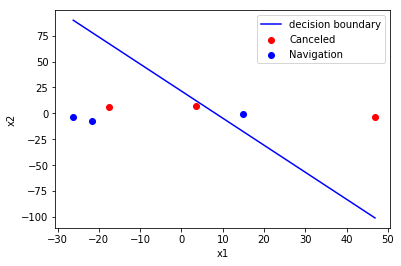

In [22]:
plt.figure(1)
plot_data(X_train_pca, y)

# draw decision boundary
plt.figure(1)
xmin, xmax = min(X_train_pca[:, 0]), max(X_train_pca[:, 0])
ymin, ymax = min(X_train_pca[:, 1]), max(X_train_pca[:, 1])
xs = np.linspace(xmin, xmax, 100)
ys = [- (w1 / w2) * x - (b / w2) for x in xs]
plt.plot(xs, ys, 'b-', label='decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.legend()
plt.show()